La Heartland Forgiveness Scale (HFS) è un questionario di autovalutazione composto da 18 item, progettato per valutare la disposizione al perdono di una persona (ossia la tendenza generale ad essere indulgente), anziché il perdono legato ad un evento o ad una persona specifica. La HFS è costituita da item che riflettono la propensione di una persona a perdonare se stessa (Sottoscala di Perdono di Sé), gli altri individui (Sottoscala di Perdono degli Altri) e situazioni al di là del controllo di chiunque (come ad esempio un disastro naturale; Sottoscala di Perdono delle Situazioni).

Sono calcolati quattro punteggi per la HFS: un punteggio totale HFS e un punteggio per ognuna delle tre sottoscala. Il punteggio totale HFS può variare da 18 a 126, mentre i punteggi per le tre sottoscala HFS possono variare da 6 a 42.

Reverse-Scoring:
Items 2, 4, 6, 7, 9, 11, 13, 15, & 17

Il Sottoscala del Perdono delle Situazioni comprende sei item, di cui tre sono formulati in maniera inversa, e si valutano su una scala a sette punti:

- HFS13. Quando le cose vanno male per motivi al di là del mio controllo, rimango intrappolato in pensieri negativi a riguardo. (R)
- HFS14. Nel tempo riesco a comprendere le circostanze negative nella mia vita.
- HFS15. Se vengo deluso da situazioni incontrollabili nella mia vita, continuo a pensare negativamente ad esse. (R)
- HFS16. Con il passare del tempo riesco a raggiungere una pace interiore riguardo alle situazioni negative nella mia vita.
- HFS17. Trovo davvero difficile accettare situazioni negative che non dipendono da nessuno. (R)
- HFS18. Col tempo lascio andare i pensieri negativi riguardo alle circostanze negative che sono al di là del controllo di chiunque.
 
Punteggi di risposta:

1 = Quasi sempre falso per me
2 = ?
3 = Più spesso falso per me
4 = ?
5 = Più spesso vero per me
6 = ?
7 = Quasi sempre vero per me


In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(rio)
    library(lavaan)
    library(psych)
    library(kableExtra)
})

In [2]:
data(bfi)
?bfi

In [3]:
d <- rio::import("data/hfs_data.csv") |>
    dplyr::select(starts_with("HFS") & -ends_with("r"))
glimpse(d)

Rows: 102
Columns: 18
$ HFS1  <int> 2, 2, 3, 5, 3, 6, 6, 3, 4, 7, 6, 7, 7, 6, 6, 2, 2, 6, 5, 3, 3, 2…
$ HFS2  <int> 5, 5, 6, 6, 7, 3, 4, 6, 1, 1, 2, 1, 1, 3, 2, 6, 6, 3, 4, 4, 2, 7…
$ HFS3  <int> 4, 4, 5, 6, 4, 3, 5, 5, 4, 7, 4, 7, 6, 6, 7, 4, 4, 6, 5, 6, 6, 3…
$ HFS4  <int> 6, 6, 6, 3, 6, 6, 3, 6, 1, 2, 2, 7, 2, 2, 5, 6, 7, 5, 5, 6, 2, 6…
$ HFS5  <int> 2, 2, 3, 5, 4, 5, 4, 4, 5, 7, 6, 7, 6, 7, 5, 4, 3, 6, 5, 6, 6, 3…
$ HFS6  <int> 5, 5, 6, 5, 7, 6, 7, 7, 1, 2, 1, 1, 1, 2, 5, 7, 7, 4, 5, 4, 2, 7…
$ HFS7  <int> 3, 3, 4, 2, 3, 3, 3, 4, 1, 1, 1, 2, 1, 1, 2, 2, 4, 2, 1, 4, 1, 2…
$ HFS8  <int> 7, 7, 5, 3, 6, 6, 5, 6, 6, 7, 6, 6, 7, 7, 6, 5, 5, 7, 6, 6, 6, 7…
$ HFS9  <int> 3, 3, 6, 4, 3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 3, 3, 2, 1, 4, 2, 3…
$ HFS10 <int> 6, 6, 2, 4, 7, 5, 4, 6, 6, 5, 4, 3, 4, 7, 6, 6, 6, 6, 5, 4, 5, 7…
$ HFS11 <int> 4, 4, 6, 4, 3, 3, 3, 2, 5, 2, 2, 6, 1, 1, 2, 4, 2, 3, 1, 3, 3, 2…
$ HFS12 <int> 7, 7, 3, 4, 4, 6, 3, 6, 6, 7, 6, 2, 7, 6, 7, 7, 6, 6, 6, 3, 5, 7…
$ HFS13 <int> 6, 6

In [4]:
dim(d)

[1] 102  18

In [5]:
hfs_situations <- d |>
    dplyr::select(HFS13:HFS18)
glimpse(hfs_situations)

Rows: 102
Columns: 6
$ HFS13 <int> 6, 6, 7, 1, 7, 1, 6, 4, 4, 1, 1, 2, 3, 2, 1, 5, 5, 5, 2, 5, 5, 5…
$ HFS14 <int> 7, 7, 5, 5, 3, 6, 6, 5, 6, 7, 7, 7, 6, 7, 7, 5, 5, 6, 6, 6, 6, 5…
$ HFS15 <int> 5, 5, 6, 4, 7, 2, 4, 4, 2, 1, 1, 2, 2, 1, 1, 5, 4, 5, 2, 4, 4, 3…
$ HFS16 <int> 7, 7, 3, 4, 4, 7, 5, 6, 6, 7, 7, 7, 7, 7, 6, 5, 6, 6, 3, 6, 6, 6…
$ HFS17 <int> 5, 5, 4, 1, 6, 5, 5, 6, 2, 1, 1, 1, 2, 2, 1, 3, 6, 2, 2, 4, 5, 3…
$ HFS18 <int> 5, 5, 4, 6, 2, 6, 3, 5, 6, 7, 7, 7, 6, 7, 6, 7, 5, 6, 6, 6, 5, 7…


Reverse-coding per gli item 13, 15, 17.

In [6]:
reversed_columns <- c("HFS13", "HFS15", "HFS17")

hfs_situations <- hfs_situations %>%
    mutate(across(all_of(reversed_columns), ~ 8 - .))

glimpse(hfs_situations)

Rows: 102
Columns: 6
$ HFS13 <dbl> 2, 2, 1, 7, 1, 7, 2, 4, 4, 7, 7, 6, 5, 6, 7, 3, 3, 3, 6, 3, 3, 3…
$ HFS14 <int> 7, 7, 5, 5, 3, 6, 6, 5, 6, 7, 7, 7, 6, 7, 7, 5, 5, 6, 6, 6, 6, 5…
$ HFS15 <dbl> 3, 3, 2, 4, 1, 6, 4, 4, 6, 7, 7, 6, 6, 7, 7, 3, 4, 3, 6, 4, 4, 5…
$ HFS16 <int> 7, 7, 3, 4, 4, 7, 5, 6, 6, 7, 7, 7, 7, 7, 6, 5, 6, 6, 3, 6, 6, 6…
$ HFS17 <dbl> 3, 3, 4, 7, 2, 3, 3, 2, 6, 7, 7, 7, 6, 6, 7, 5, 2, 6, 6, 4, 3, 5…
$ HFS18 <int> 5, 5, 4, 6, 2, 6, 3, 5, 6, 7, 7, 7, 6, 7, 6, 7, 5, 6, 6, 6, 5, 7…


In [7]:
round(cov(hfs_situations), 2)

,HFS13,HFS14,HFS15,HFS16,HFS17,HFS18
HFS13,3.23,1.31,1.71,1.08,1.58,1.39
HFS14,1.31,2.16,1.24,1.44,1.16,1.28
HFS15,1.71,1.24,2.60,1.05,1.85,1.10
HFS16,1.08,1.44,1.05,2.24,1.08,1.40
HFS17,1.58,1.16,1.85,1.08,3.39,1.43
HFS18,1.39,1.28,1.10,1.40,1.43,2.17


In [8]:
round(cor(hfs_situations), 2)

,HFS13,HFS14,HFS15,HFS16,HFS17,HFS18
HFS13,1.00,0.50,0.59,0.40,0.48,0.53
HFS14,0.50,1.00,0.52,0.66,0.43,0.59
HFS15,0.59,0.52,1.00,0.44,0.62,0.46
HFS16,0.40,0.66,0.44,1.00,0.39,0.64
HFS17,0.48,0.43,0.62,0.39,1.00,0.53
HFS18,0.53,0.59,0.46,0.64,0.53,1.00


In [9]:
hfs_sit_long <- hfs_situations %>%
    pivot_longer(cols = starts_with("HFS"), names_to = "item", values_to = "score")

head(hfs_sit_long)

item,score
<chr>,<dbl>
HFS13,2
HFS14,7
HFS15,3
HFS16,7
HFS17,3
HFS18,5


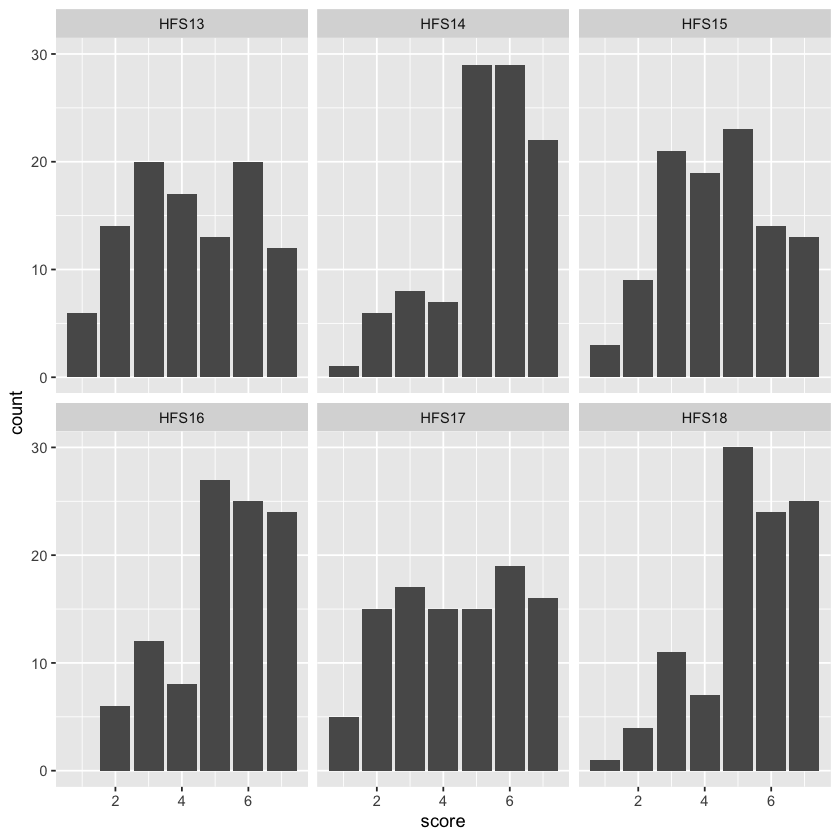

In [10]:
hfs_sit_long |>
    ggplot(aes(score)) +
    geom_bar() +
    facet_wrap(~item)

In [11]:
psych::describe(hfs_situations) |> round(2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HFS13,1,102,4.23,1.80,4.0,4.23,2.97,1,7,6,-0.03,-1.16,0.18
HFS14,2,102,5.27,1.47,5.5,5.44,0.74,1,7,6,-0.84,0.06,0.15
HFS15,3,102,4.41,1.61,4.0,4.43,1.48,1,7,6,-0.05,-0.87,0.16
HFS16,4,102,5.23,1.50,5.0,5.35,1.48,2,7,5,-0.60,-0.63,0.15
HFS17,5,102,4.38,1.84,4.0,4.41,2.97,1,7,6,-0.11,-1.22,0.18
HFS18,6,102,5.28,1.47,5.0,5.43,1.48,1,7,6,-0.71,-0.19,0.15


In [12]:
mod_1 <- "
    # SitP loadings (all estimated)
    Sit =~ HFS14 + HFS16 + HFS18 + HFS13 + HFS15 + HFS17
"
fit_1 <- sem(model = mod_1, data = hfs_situations, estimator = "MLR", mimic = "mplus", std.lv = TRUE)
print(
    summary(fit_1, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)
)

lavaan 0.6.15 ended normally after 15 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        18

  Number of observations                           102
  Number of missing patterns                         1

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                                35.816      21.787
  Degrees of freedom                                 9           9
  P-value (Chi-square)                           0.000       0.010
  Scaling correction factor                                  1.644
    Yuan-Bentler correction (Mplus variant)                       

Model Test Baseline Model:

  Test statistic                               281.284     183.159
  Degrees of freedom                                15          15
  P-value                                        0.000       0.000
  Scaling correcti

In [13]:
mod_4 <- "
    # SitP loadings (all estimated)
    SitP =~ HFS14 + HFS16 + HFS18
    # SitN loadings (all estimated)
    SitN =~ HFS13 + HFS15 + HFS17
"
fit_4 <- sem(model = mod_4, data = hfs_situations, estimator = "MLR", mimic = "mplus", std.lv = TRUE)
print(
    summary(model04Estimates, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE)
)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'summary': object 'model04Estimates' not found


In [38]:
anova(fit_1, fit_4)

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit_4,8,2082.968,2132.842,14.57982,NA,NA,NA
fit_1,9,2102.204,2149.453,35.81564,7.764838,1,0.005327307
